In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import sklearn
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("Boston.csv")

## Data Preprocessing

In [3]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 15)

In [5]:
df.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [7]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,506.0,252.500000,146.213884,0.00000,126.250000,252.50000,378.750000,505.0000
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000


In [8]:
df.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [9]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [10]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Visualization Of DataSet

In [11]:
import seaborn as sns

In [12]:
import warnings
warnings.filterwarnings("ignore")

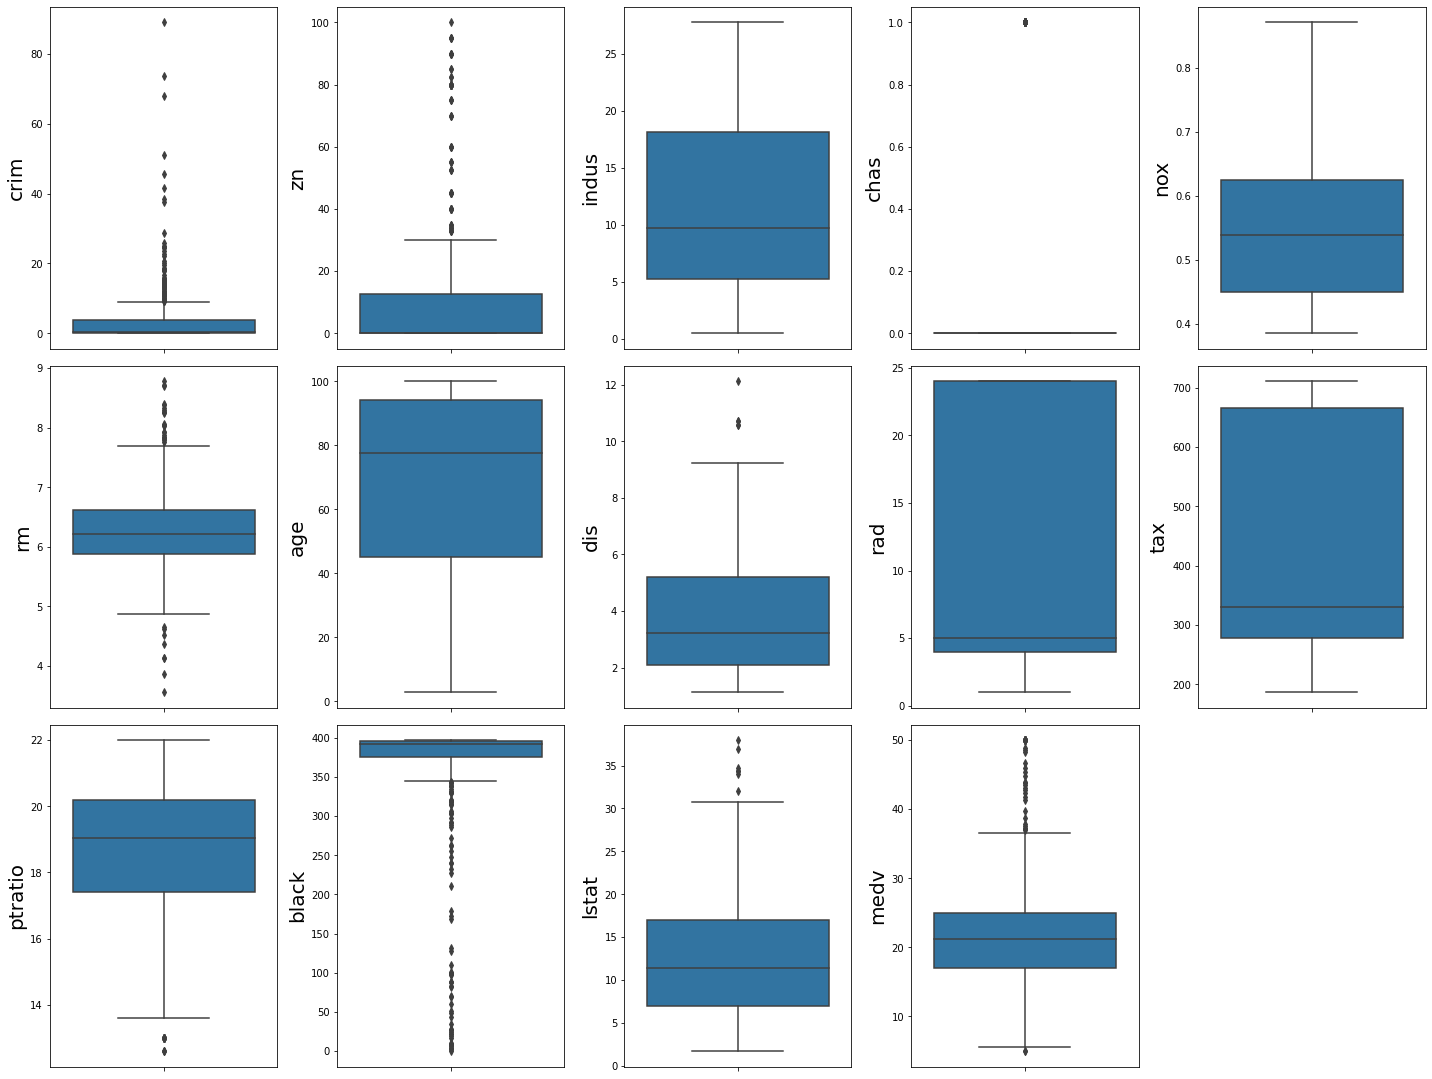

In [13]:
plt.figure(figsize = (20,20), facecolor = "white")
plotnumber = 1

for column in df:
    if plotnumber <= 15:
        ax = plt.subplot(4,5, plotnumber)
        sns.boxplot(y = column, data = df)
        plt.ylabel(column, fontsize = 20)
    plotnumber += 1
plt.tight_layout()

Columns like CRIM, ZN, RM, B seems to have outliers.

In [14]:
df["medv"].quantile(.98)

50.0

In [15]:
q = df["medv"].quantile(.98)
df = df[df["medv"]<q]

In [16]:
df.shape

(490, 14)

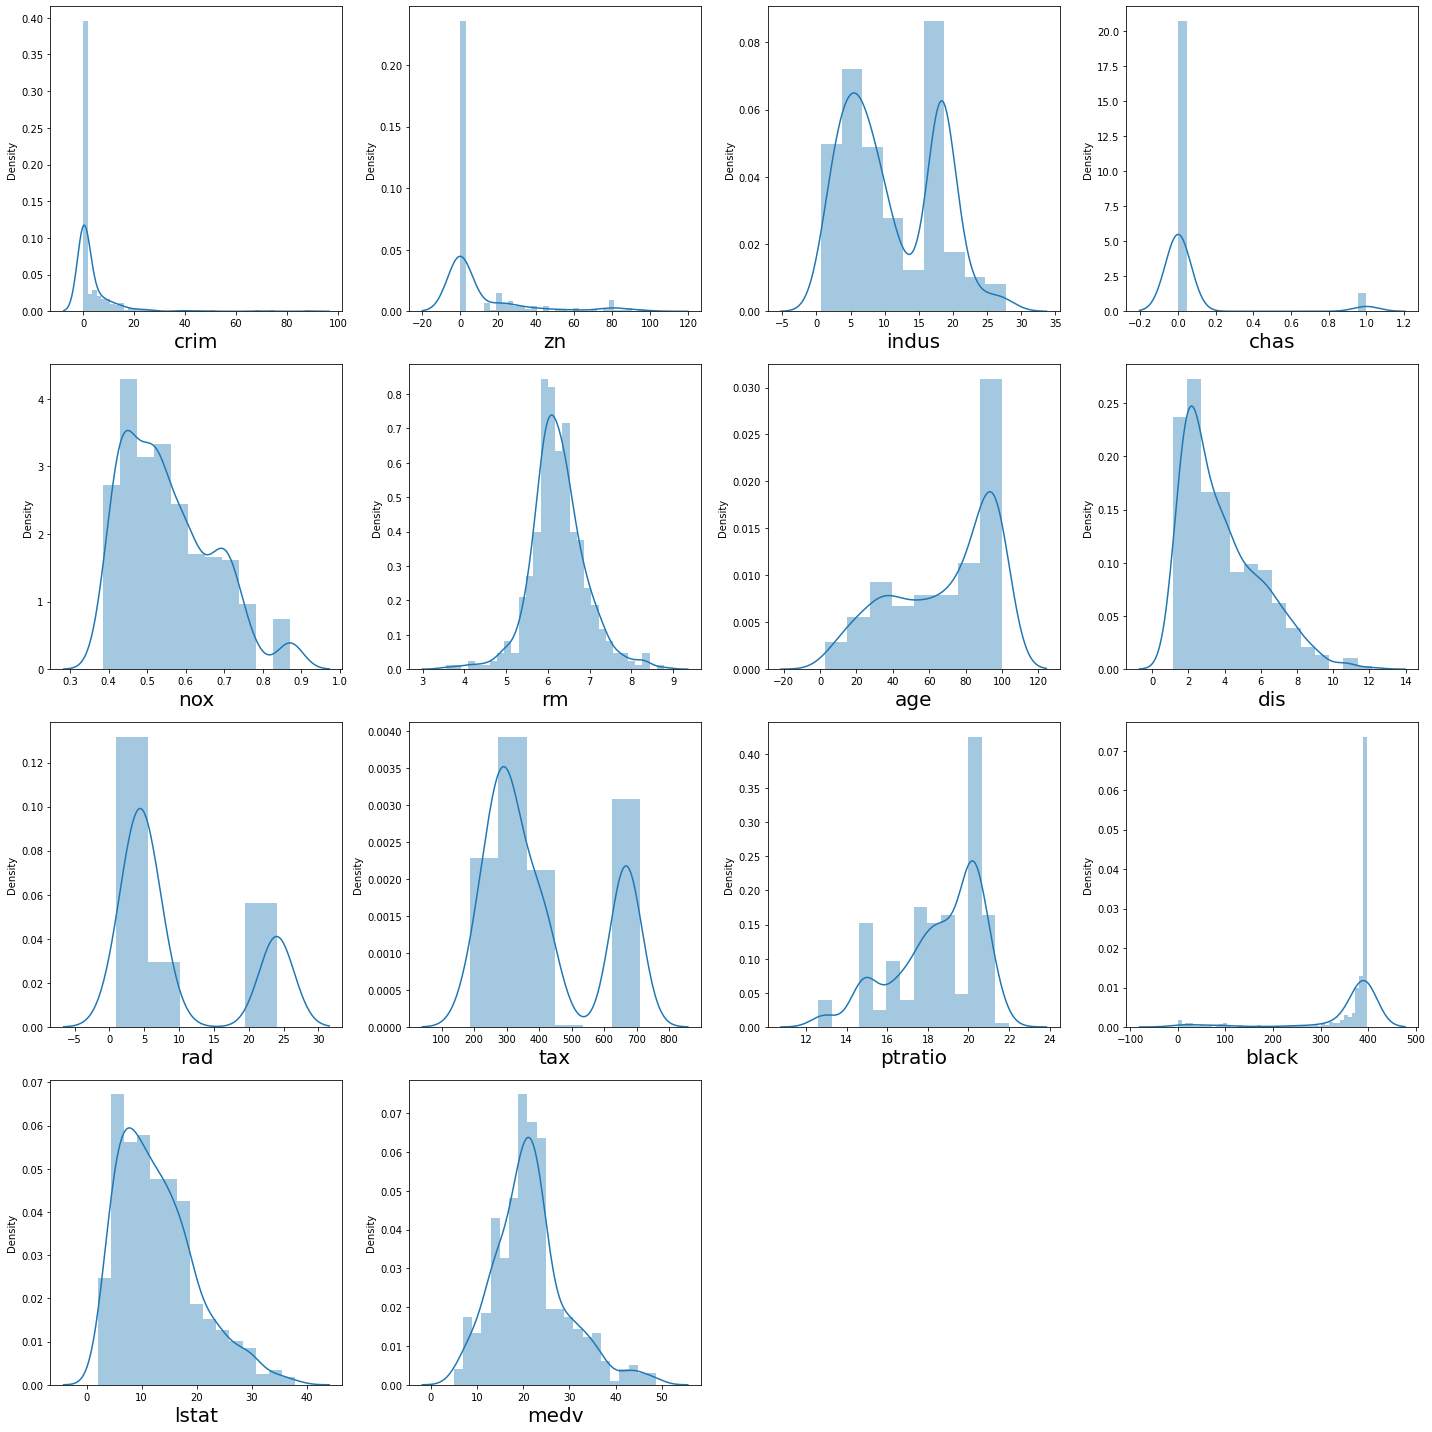

In [17]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:>

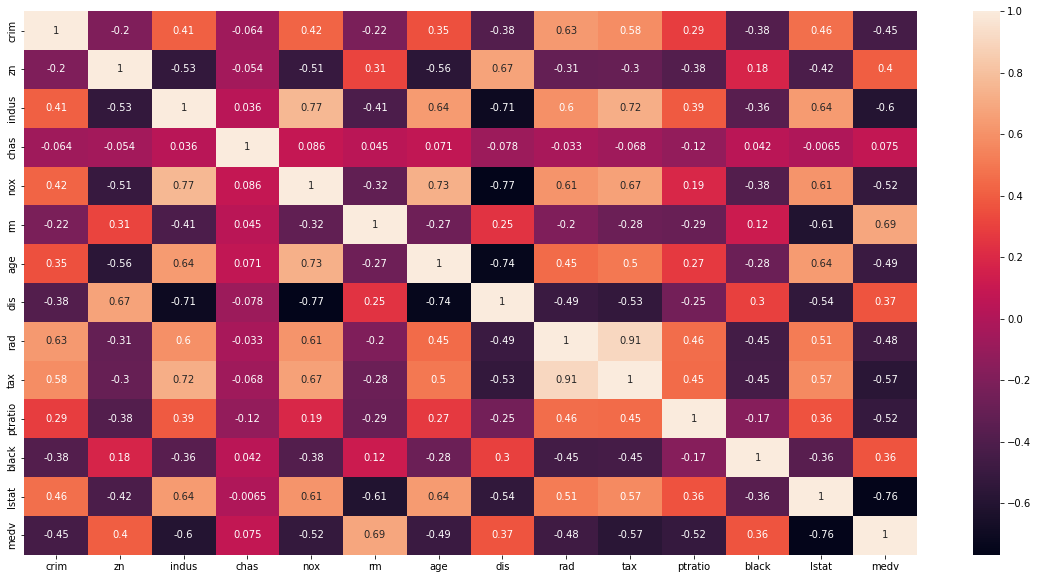

In [18]:
plt.figure(figsize= (20,10), facecolor="white")
sns.heatmap(df.corr(), annot = True)

From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors. Let's plot these columns against MEDV.

In [19]:
y = df["medv"]
x = df.drop(columns = ["medv"])

In [20]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [21]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 490, dtype: float64

In [22]:
x.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

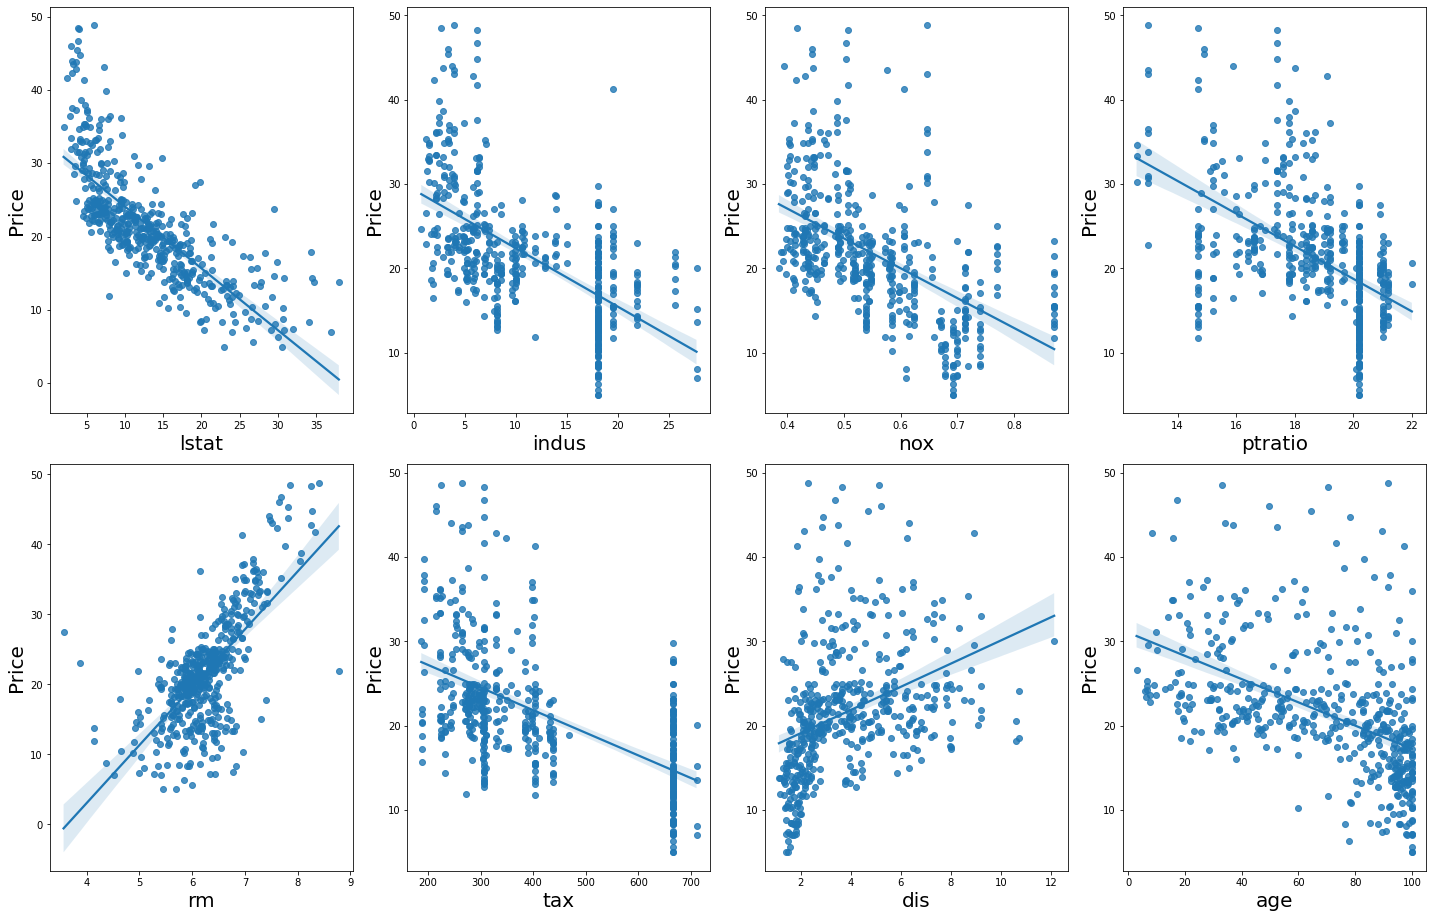

In [23]:
plt.figure(figsize= (20,25))
plotnumber = 1
column_sels = ['lstat', 'indus', 'nox', 'ptratio', 'rm', 'tax', 'dis', 'age']
for col in column_sels:
    if plotnumber <= 13:
        ax = plt.subplot(4,4,plotnumber)
        sns.regplot(x[col], y)
        plt.xlabel(col, fontsize=20)
        plt.ylabel("Price", fontsize=20)
    plotnumber += 1
plt.tight_layout()

## VIF Testing Our Dataset

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
x_scaler = scaler.fit_transform(x)

In [27]:
x_scaler

array([[-0.41740129,  0.30181252, -1.29185589, ..., -1.52727975,
         0.44353452, -1.12267925],
       [-0.41499231, -0.4869242 , -0.59332877, ..., -0.34150355,
         0.44353452, -0.53477219],
       [-0.41499461, -0.4869242 , -0.59332877, ..., -0.34150355,
         0.39955339, -1.25693687],
       ...,
       [-0.41115333, -0.4869242 ,  0.11987329, ...,  1.17628999,
         0.44353452, -1.02940553],
       [-0.40554922, -0.4869242 ,  0.11987329, ...,  1.17628999,
         0.40625322, -0.91069353],
       [-0.41268548, -0.4869242 ,  0.11987329, ...,  1.17628999,
         0.44353452, -0.71284019]])

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
x_scaler.shape[1]

13

In [30]:
vif = pd.DataFrame()
vif["VIF Score"] = [variance_inflation_factor(x_scaler, i) for i in range(x_scaler.shape[1])]
vif["Columns"] = x.columns

In [31]:
vif

,VIF Score,Columns
0,1.794459,crim
1,2.293841,zn
2,3.995187,indus
3,1.062154,chas
4,4.402973,nox
5,1.885332,rm
6,3.114563,age
7,3.976105,dis
8,7.366036,rad
9,8.790275,tax


Hence, we have the correlation values for all the features. As a thumb rule,

If VIF value greater than 5 means a very severe multicollinearity

Here we have tax and rad feature whose vif score is greater than 5, hence we drop them.

In [32]:

x_new = pd.DataFrame(x_scaler, columns = x.columns)

In [33]:
x_new.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-0.417401,0.301813,-1.291856,-0.250812,-0.139895,0.505040,-0.109432,0.121208,-0.980635,-0.667101,-1.527280,0.443535,-1.122679
1,-0.414992,-0.486924,-0.593329,-0.250812,-0.731821,0.269017,0.377488,0.537330,-0.865459,-0.988734,-0.341504,0.443535,-0.534772
2,-0.414995,-0.486924,-0.593329,-0.250812,-0.731821,1.439934,-0.255152,0.537330,-0.865459,-0.988734,-0.341504,0.399553,-1.256937
3,-0.414412,-0.486924,-1.310933,-0.250812,-0.826186,1.153335,-0.798939,1.056878,-0.750284,-1.107857,0.085376,0.419005,-1.410980
4,-0.410202,-0.486924,-1.310933,-0.250812,-0.826186,1.381694,-0.500390,1.056878,-0.750284,-1.107857,0.085376,0.443535,-1.073216


['lstat', 'indus', 'nox', 'ptratio', 'rm', 'tax', 'dis', 'age']

In [34]:
x_new.drop(columns = ["tax", "rad", "crim", "zn", "chas", "rad", "black"], inplace = True)

In [35]:
x_new.shape

(490, 7)

## Lets split our dataset into train & test

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = .25, random_state= 234)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [40]:
regression.score(x_train, y_train)

0.7465211551545691

In [41]:
regression.score(x_test, y_test)

0.7337415113954107

In [42]:
y_pred = regression.predict(x_test)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [44]:
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.7337415113954107
3.3959276058492405
20.053434501361732


In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
model1 = RandomForestRegressor()
model1.fit(x_train, y_train)

RandomForestRegressor()

In [61]:
model1.score(x_train, y_train)

0.9777756292821351

In [62]:
model1.score(x_test, y_test)

0.8801102211367362

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
rf_parameters={'n_estimators': [100,200,300,400,500,600],
                       'max_features': ['auto', 'sqrt'],
                       'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                       'min_samples_split': [2, 5, 10],
                       'min_samples_leaf': [1, 2, 4],
                       'bootstrap': [True, False]
                    }

In [65]:
rf_reg = RandomForestRegressor()
random_rf = RandomizedSearchCV(estimator=rf_reg,
                                        param_distributions=rf_parameters,
                                        cv=5,
                                        scoring='neg_root_mean_squared_error',
                                        n_iter=10,
                                        n_jobs=-1,
                                        verbose=2,
                                        random_state=101
                                        )
random_rf.fit(x_train,y_train)
best_param = random_rf.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [66]:
rf_model = RandomForestRegressor(n_estimators = best_param['n_estimators'],
                                            min_samples_split = best_param['min_samples_split'],
                                            min_samples_leaf = best_param['min_samples_leaf'],
                                            max_features = best_param['max_features'],
                                            max_depth = best_param['max_depth'],
                                            bootstrap = best_param['bootstrap'])

In [67]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      min_samples_split=5, n_estimators=600)

In [68]:
rf_model.score(x_train, y_train)

0.9922751868049369

In [69]:
rf_model.score(x_test, y_test)

0.8774351927326297